# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [4]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    
    niter = 0
    x1=0
    x=x0
    while (abs(x-x1)>= eps) and (niter<maxiter):
        niter = niter+1
        x1 = x
        x = x - f(x)/fder(x)
    return x, niter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [5]:
newton_iteration(f = lambda x: x**2 -1, fder = lambda x: 2*x, x0 = 2) # пример 1

(1.000000000000001, 5)

In [6]:
newton_iteration(f = lambda x: x**3, fder = lambda x: 3*x**2, x0 = 1) # пример 2 
# Интересный случай, где корень является экстремумом функции. Заметим, что в таком случае наш метод ломается

(1.7600945796607144e-05, 27)

In [7]:
newton_iteration(f = lambda x: x**3 -8, fder = lambda x: 3*x**2, x0 = 3) # пример 3

(2.0000000000000226, 5)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [1]:
def n_i2(f, fder, x0, m, eps=1e-5, maxiter=1000): 
    niter = 0
    x1=0
    x=x0
    while (abs(x-x1)>= eps) and (niter<maxiter):
        niter = niter+1
        x1 = x
        x = x - m*f(x)/fder(x)
    return x, niter

In [4]:
for i in range(1, 6):
    x, niter = n_i2(f = lambda x: (x**2 -1)**2, fder = lambda x: 2*(x**2-1)*2*x, x0 = 2, m = i) # пример 1
    print(x, niter)

1.0000078296573287 18
1.000000000000001 5
0.9999978588127855 17
2.0 1000
2.239676310795981 1000


In [13]:
for i in range(1, 6):
    x, niter = n_i2(f = lambda x: (x**3 -8)**3, fder = lambda x: 3*((x**3 -8)**2)*3*x**2, x0 = 3, m=i) # пример 2
    print(x, niter)

2.000015004647361 29
2.000001939071927 13
2.0000000000000226 5
2.000000946255614 11
2.000003337233549 28


Заметим, что наибольшей точности мы достигаем при m равном кратности корня

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

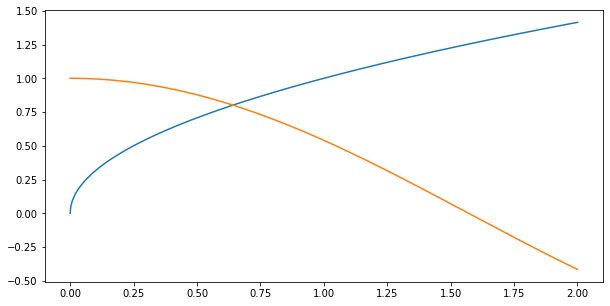

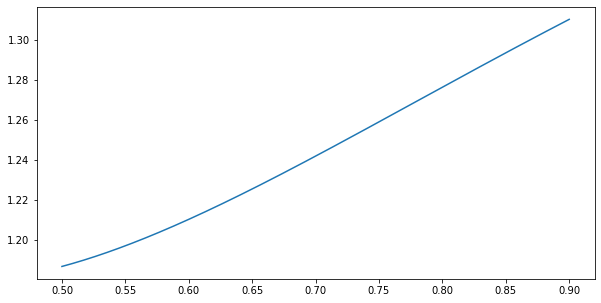

Корень 0.6417143300759067
Количество итераций 3


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Строим функции
x = np.linspace(0, 2, 1000)
sq = np.sqrt(x)
cs = np.cos(x)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(x, sq, label = 'sqrt')
ax.plot(x, cs, label = 'cos')


# Строим производную, чтобы посмотреть, где на участке она максимальна, а где минимальна
x = np.linspace(0.5, 0.9, 1000)
der = 0.5/(np.sqrt(x))+ np.sin(x)
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(x, der)

plt.show()

eps=1e-5

def f(x):
    return np.sqrt(x)-np.cos(x)

def fder(x):
    return 0.5/(np.sqrt(x))+ np.sin(x)

maxiter = 1000
alf = 2/(fder(0.5)+fder(0.8))   
n = 0
x1=0
x=0.75
while (abs(x-x1)>= eps) and (n<maxiter):
    n = n+1
    x1 = x
    x = x - alf*f(x)
print('Корень', x)
print('Количество итераций', n)

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.